# Ecommerce Customer Churn Analysis

## Review of Churn dataset to determine opportunities to reduce customer churn.

In [293]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [294]:
ecommerce_raw = pd.read_excel("E Commerce dataset 21.xlsx")

## Understanding the dataset

There are 20 columns, 5,630 rows.

In [295]:
ecommerce_raw.shape

(5630, 20)

In [296]:
ecommerce_raw.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [297]:
ecommerce_raw.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [298]:
ecommerce_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


## Cleaning the Dataset

In [299]:
ecommerce_raw.duplicated().sum()

0

There are no duplicate values.

Check for missing values:

In [300]:
ecommerce_raw.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [301]:
ecommerce_raw.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


The variables Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, and DaySinceLastOrder have missing values ranging from 264-307.  With 5,629 rows of data, this accounts for approximately 5% of the values in these variables.

## Handling the Missing Values

Copying the data frame into another one

In [302]:
df_fxms=ecommerce_raw.copy()

In [303]:
df_fxms.drop(['CustomerID'],axis=1, inplace=True)

Focusing on the columns with missing data:

In [304]:
for i in df_fxms.columns:
    if df1[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df1[i].isnull().sum())
        print('the datatype is', df1[i].dtypes)
        print()

Filling the missing values with the median values:

In [305]:
for i in df_fxms.columns:
    if df1[i].isnull().sum() > 0:
        df1[i].fillna(df1[i].median(),inplace=True)

In [306]:
df_fxms.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


Text(0, 0.5, 'Values')

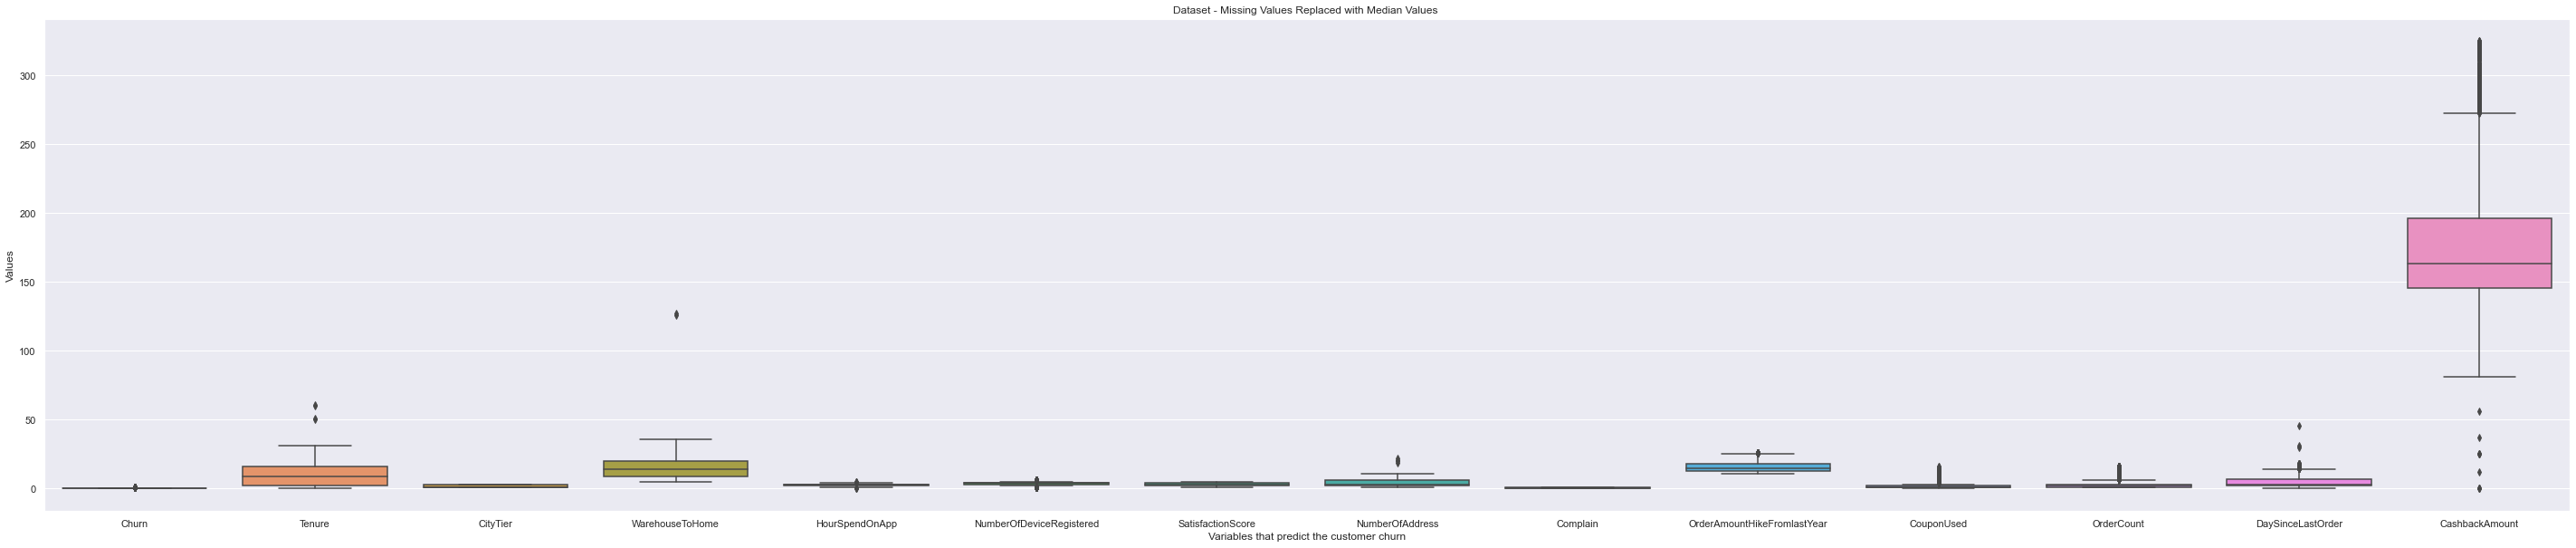

In [307]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df_fxms)
plt.title('Dataset - Missing Values Replaced with Median Values ')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

## Exploring Outliers

Outliers are being defined as the lower range and upper range which is going to be at a distance of 1.5 times the Interquartile range from the respective whiskers

In [308]:
Q1 = df_fxms.quantile(0.25)
Q3 = df_fxms.quantile(0.75)
IQR = Q3-Q1

In [309]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

In [310]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Outliers = df_fxms [ ((df_fxms < Lower_Limit) | ((df_fxms > Upper_Limit))).any(axis=1) ]
Proportion = len(Outliers)/len(df_fxms)
print(1-Proportion)

0.5904085257548846


Removing outliers constitutes a significant loss of data (41%). Additionally, outlier scenarios may be of value to churn scenario explanation.  For these reasons, outliers are not being redacted or normalized.

## Exploring Null Values

Copying the dataset thus far.

In [311]:
df_clean=df_fxms.copy()

In [312]:
print(df_clean)
is_NaN = df_clean. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df_clean[row_has_NaN]
print(rows_with_NaN)

      Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     NaN                Phone         1              8.0   
2         1     NaN                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                   

In [313]:
is_NaN

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5626,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5627,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5628,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# High-Level Review of Variables

Focusing on Churn, review of Variable distribution and associations.

In [314]:
n_churn = len(df_fxms)

In [315]:
frequency_churn = df_fxms["Churn"].value_counts()
print(frequency_churn)

0    4682
1     948
Name: Churn, dtype: int64


948 of 5629 customers churned, accounting for 16.8% of the dataset.

## Univariate Analysis

In [316]:
cat=[]
num=[]
for i in df_fxms.columns:
  if df_fxms[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [317]:
df_fxms[cat].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


Categorical Variable count, unqiueness, and top value.

In [318]:
df_fxms[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


Numerical Variable characteristics.

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'CityTier'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>],
       [<AxesSubplot:title={'center':'HourSpendOnApp'}>,
        <AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>,
        <AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>],
       [<AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>,
        <AxesSubplot:title={'center':'CouponUsed'}>,
        <AxesSubplot:title={'center':'OrderCount'}>],
       [<AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

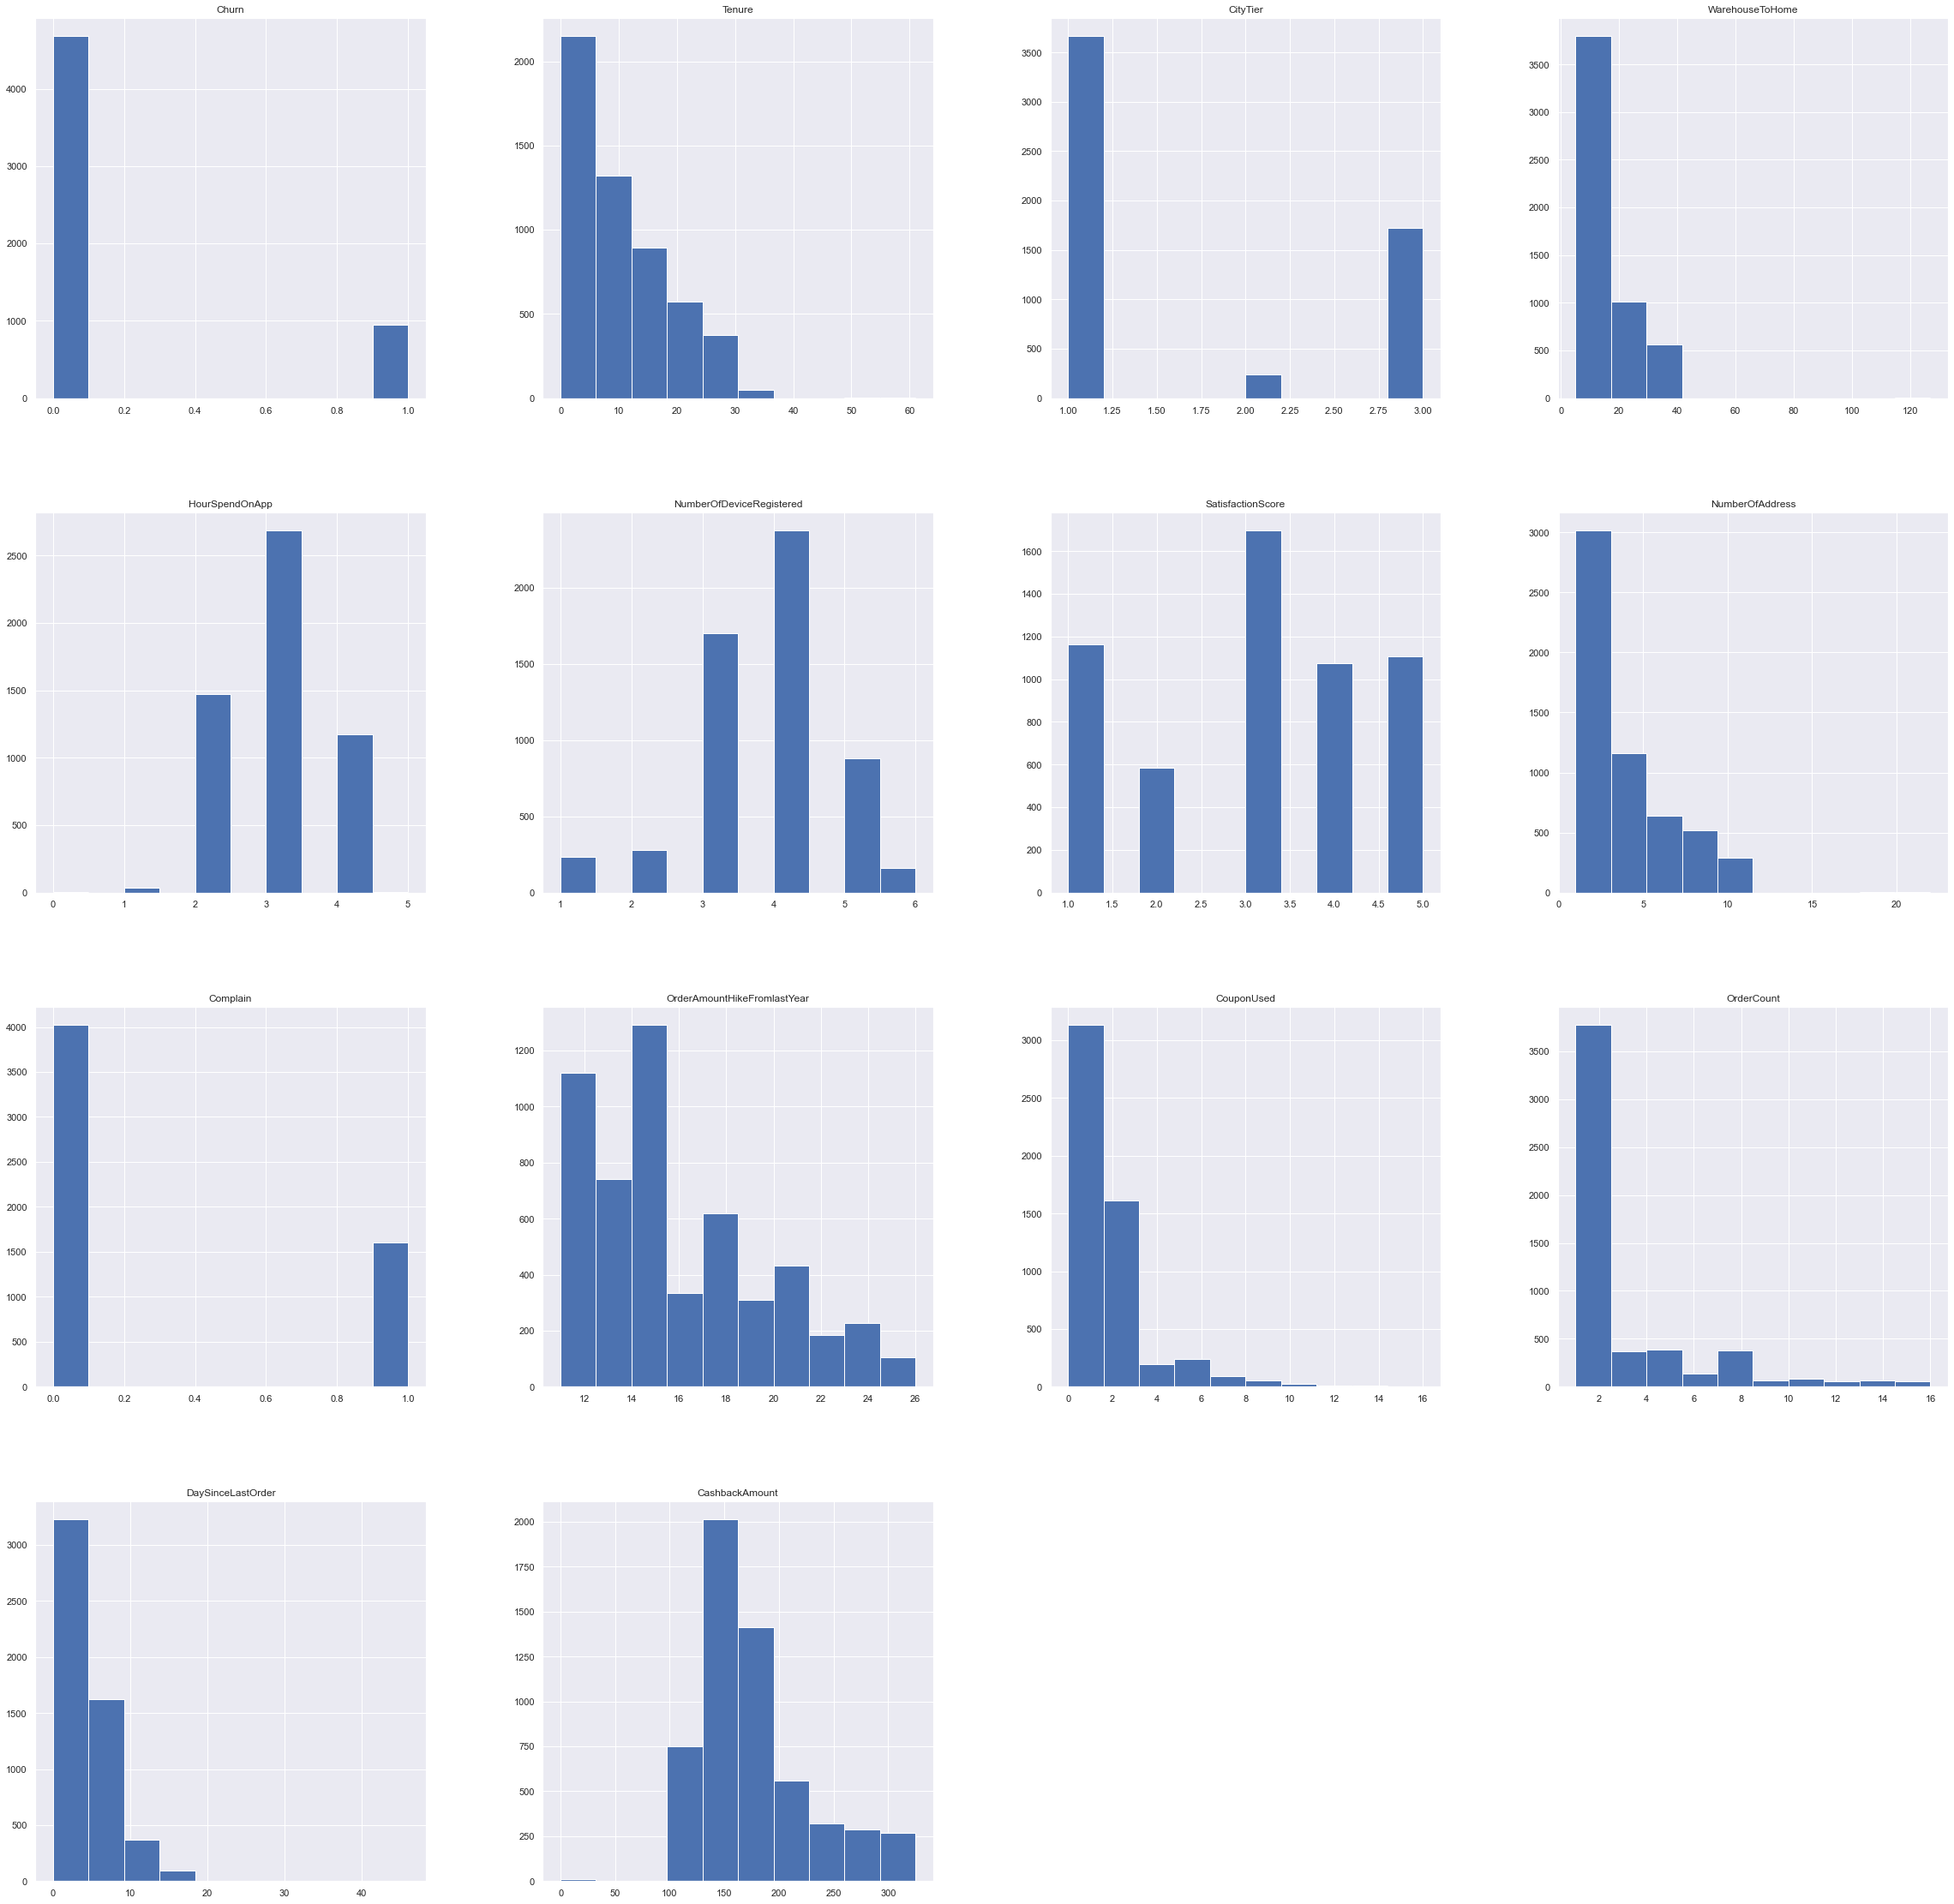

In [319]:
df_fxms[num].hist(figsize=(40,40))

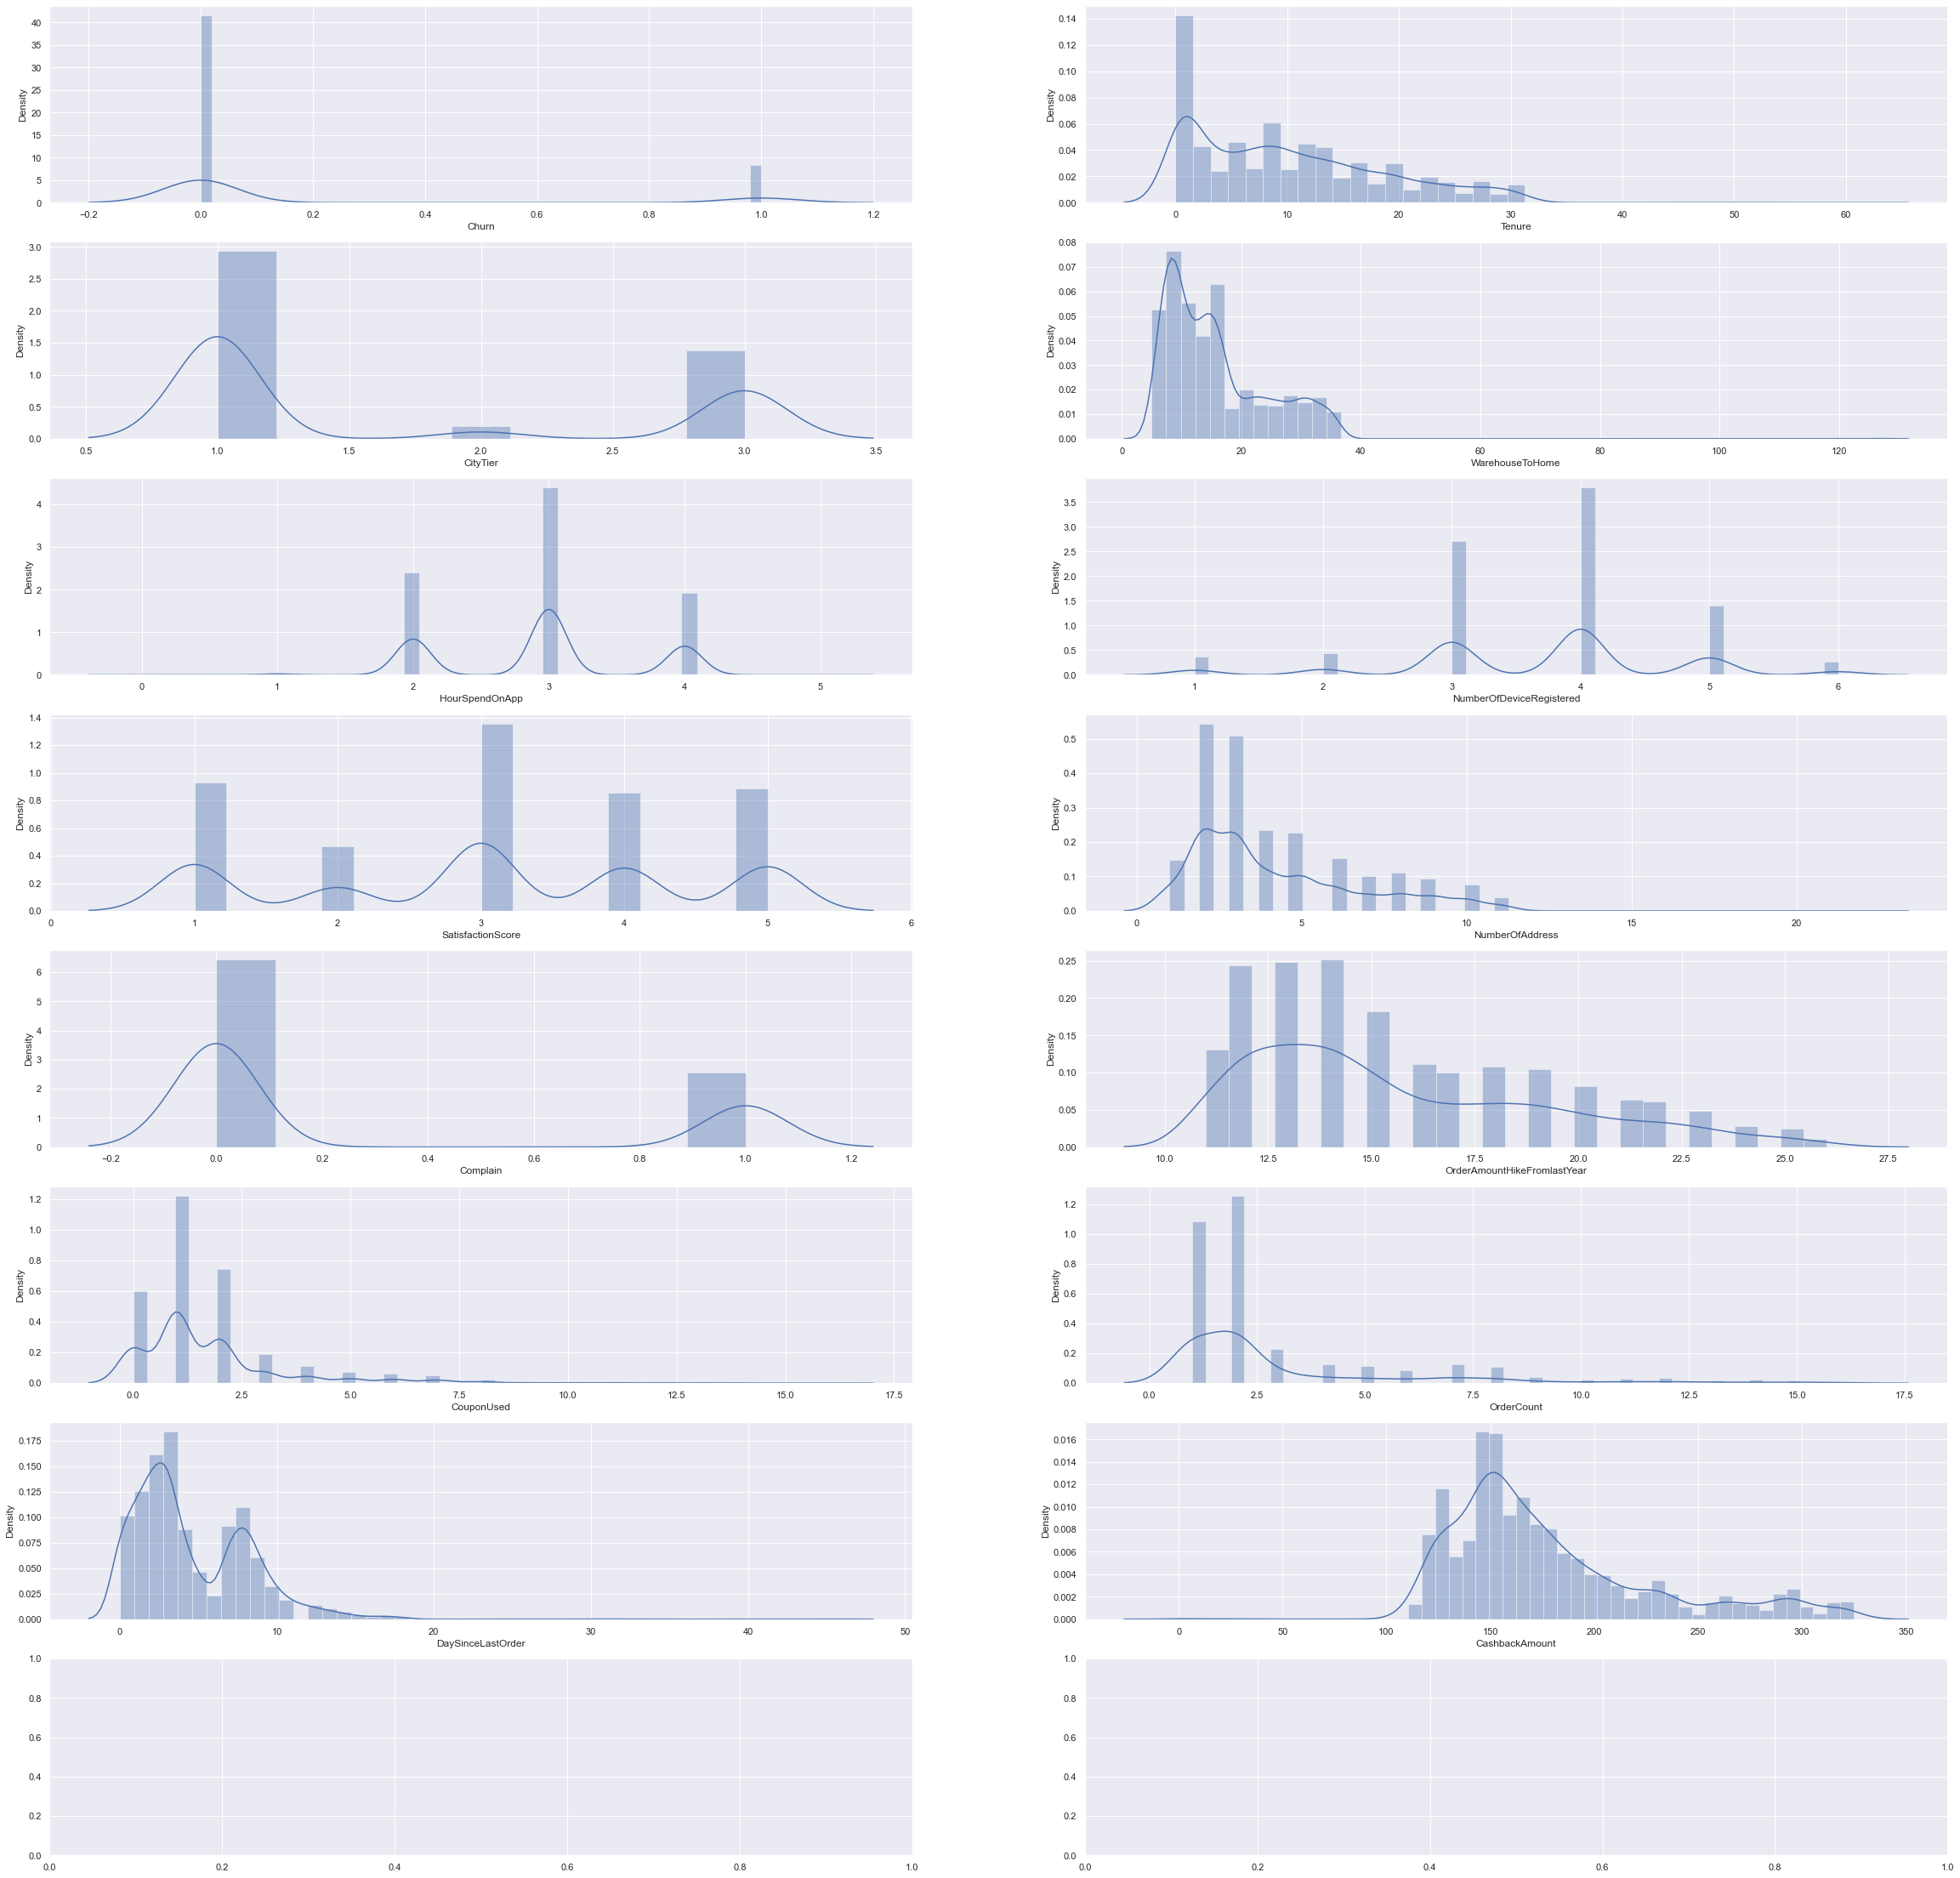

In [320]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df_fxms[i], ax=subplot)

## Linear Correlation of Variables 

<AxesSubplot:>

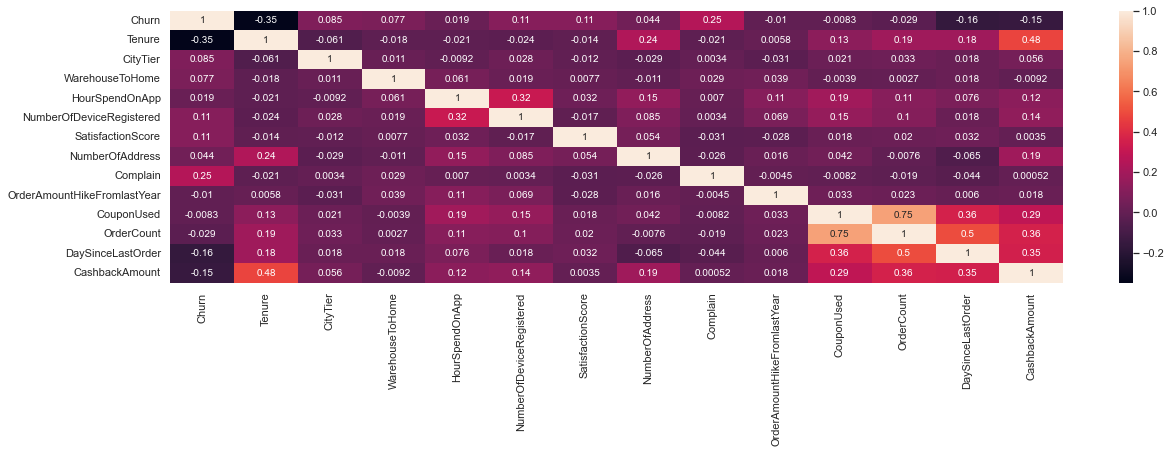

In [321]:
plt.figure(figsize=(20,5))
sns.heatmap(df_fxms.corr(),annot=True)

Review of the linear correlation of values in regard to Churn shows the most significant association between Complain/Churn at +0.25 Tenure/Churn at -0.35.      Tenure/Cashback Amount: 0.48

Additional groupings of significance are Tenure/CashbackAmount at 0.48, CouponUsed/OrderCount at 0.75, and DaySinceLastOrder/OrderCount at 0.5

# Focusing on Variables of Interest

Selecting values for closer review:
1) Variables most closely correlated to Churn: Complain, Tenure
2) Variables showing correlation to each other: Tenure/CashbackAmount, CouponUsed/OrderCount, DaySinceLastOrder/OrderCount.

In [322]:
df_final = df_fxms[["Churn","Complain","Tenure","CashbackAmount","CouponUsed","OrderCount","DaySinceLastOrder"]]

In [323]:
df_final.columns

Index(['Churn', 'Complain', 'Tenure', 'CashbackAmount', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder'],
      dtype='object')

<AxesSubplot:>

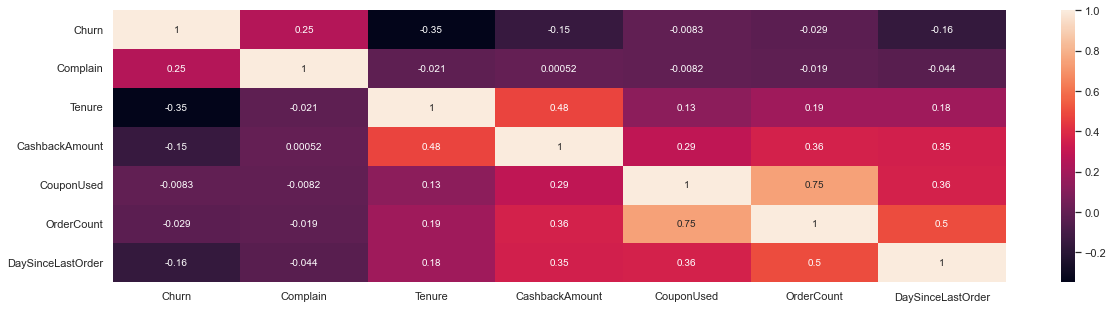

In [324]:
plt.figure(figsize=(20,5))
sns.heatmap(df_final.corr(),annot=True)

There are several points of interest showing in the correlation of variables to Churn.

In [325]:
df_final.describe()

,Churn,Complain,Tenure,CashbackAmount,CouponUsed,OrderCount,DaySinceLastOrder
count,5630.000000,5630.000000,5366.000000,5630.000000,5374.000000,5372.000000,5323.000000
mean,0.168384,0.284902,10.189899,177.223030,1.751023,3.008004,4.543491
std,0.374240,0.451408,8.557241,49.207036,1.894621,2.939680,3.654433
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,145.770000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,9.000000,163.280000,1.000000,2.000000,3.000000
75%,0.000000,1.000000,16.000000,196.392500,2.000000,3.000000,7.000000
max,1.000000,1.000000,61.000000,324.990000,16.000000,16.000000,46.000000


Text(0, 0.5, 'Values')

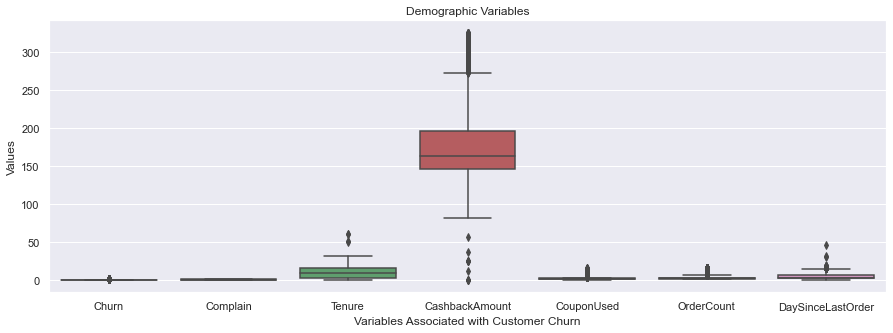

In [326]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_final)
plt.title('Demographic Variables')
plt.xlabel('Variables Associated with Customer Churn')
plt.ylabel('Values')

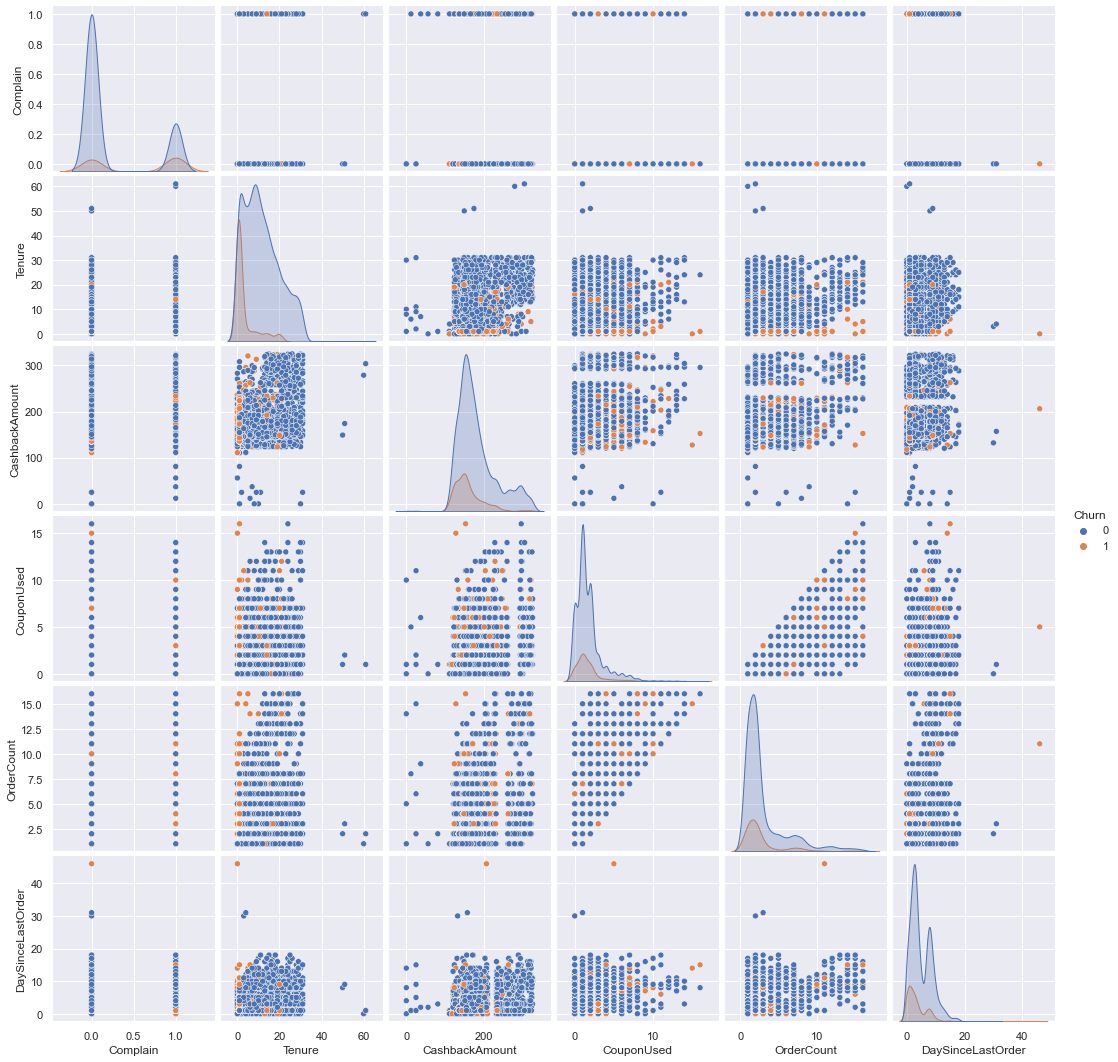

In [327]:
sns.pairplot(data=df_final, hue="Churn")

## Churn & Complain

The churn numbers were similar between those who complained and those who did not.  However, retained customers were significantly less likely to have complaints. 

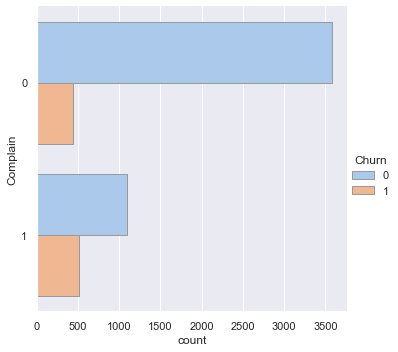

In [328]:
sns.catplot(y="Complain", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_final)

## Churn & Tenure

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

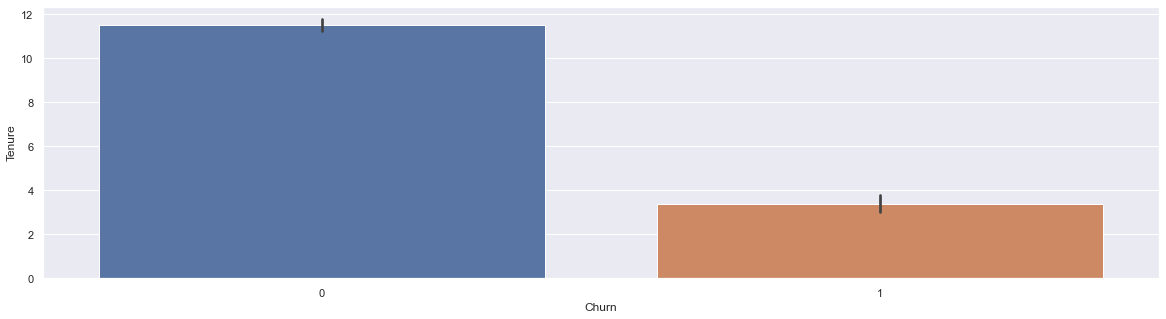

In [329]:
sns.barplot(data=df_final, x="Churn", y="Tenure")

# Churn associated with Cashback, CouponUsed, and Order Count

Tenure and CashbackAmount have a correlation value of 0.48.  Looking at these variables in the context of Churn, it is apparent that the greater number of churn happens early in the customers Tenure.  Cashback amount peaks for all customers at approximately 150, however, retained customers show higher cashback amounts overall.  

<Figure size 216x720 with 0 Axes>

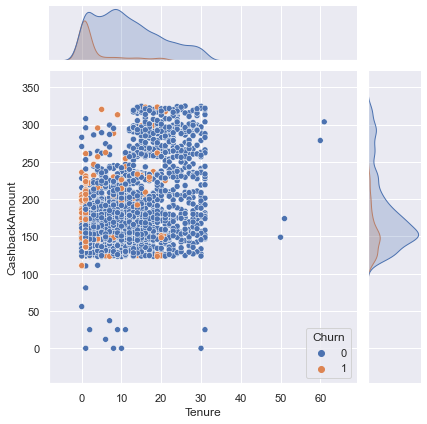

In [330]:
plt.figure(figsize=(3,10))
sns.jointplot(data=df_final, x="Tenure", y="CashbackAmount", hue="Churn")

# Churn associated with Cashback, CouponUsed, and Order Count

CouponUsed and OrderCount have the strongest correlation in the dataset with a value of 0.75. The peak OrderCount is approximately 2 for both Churn and Retained customers. 

Retained customers show significantly higher CouponUsed values.

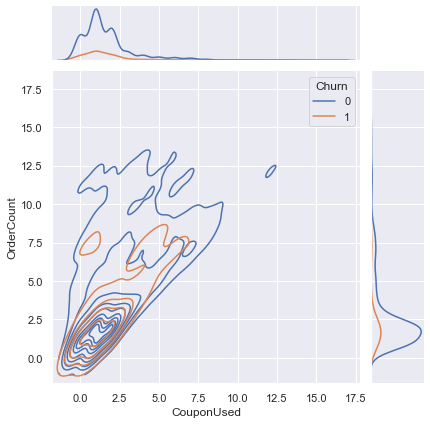

In [335]:
sns.jointplot(data=df_final, x="CouponUsed", y="OrderCount", hue="Churn", kind="kde")

# DaySinceLastOrder, OrderCount, and Churn

DaySinceLastOrder and OrderCount have a correlation value of 0.5.  There are two peaks for DaySinceLastOrder at approximately 3, and 8.

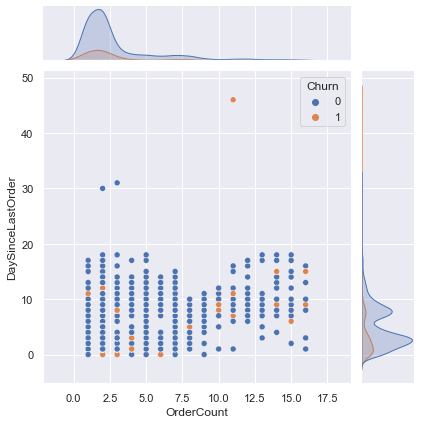

In [336]:
sns.jointplot(data=df_final, x="OrderCount", y="DaySinceLastOrder", hue="Churn")